# Classify the text data using logit
#    Sentiment Analysis
#    Gender determination - by just looking at the names

#Stemming  #tokenize or segment  --- nltk
#Vectorising
#Sentiment Analysis
#imdb website
#imdb.csv


# using snowballstemmer and CountVectorizer

In [1]:
#1 Importing the Dataset
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['review'][0] #shows the 1st row of given column,  Creative Commons CC By Attributution 

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
# Stemming the Documents (Review Column)
# working: work(stem) + ing(suffix)
#snowballstemmer
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

def stemmer_tokenize(text):
    return[snow_stemmer.stem(word) for word in text.split()] #word_tokenize()

In [7]:
stemmer_tokenize("We love coding. Hence we keep coding and learning")

['we', 'love', 'coding.', 'henc', 'we', 'keep', 'code', 'and', 'learn']

In [11]:
#4 Vectorising the text data #stanfordnlp (converting text to numbers)
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer # Countvertorizer
cfidf = CountVectorizer(strip_accents = None, lowercase = False, tokenizer = stemmer_tokenize)


In [12]:
Y = df.sentiment.values
X = cfidf.fit_transform(df.review) #learn vocabolory

In [13]:
#5 Document Classification/Sentiment Analysis using Logistic Regression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, shuffle = False)

import pickle #(to create dump file)

from sklearn.linear_model import LogisticRegressionCV

logitCV = LogisticRegressionCV (cv =5, scoring = 'accuracy', max_iter = 200).fit(X_train, Y_train)

saved_model = open('saved_model_2.sav', 'wb') #create a file

pickle.dump(logitCV, saved_model)

saved_model.close()

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [14]:
#6 RUN THE SAVED MODEL

filename = 'saved_model_2.sav'
saved_logitCV = pickle.load(open(filename, 'rb'))
saved_logitCV.score(X_test, Y_test)

0.88832

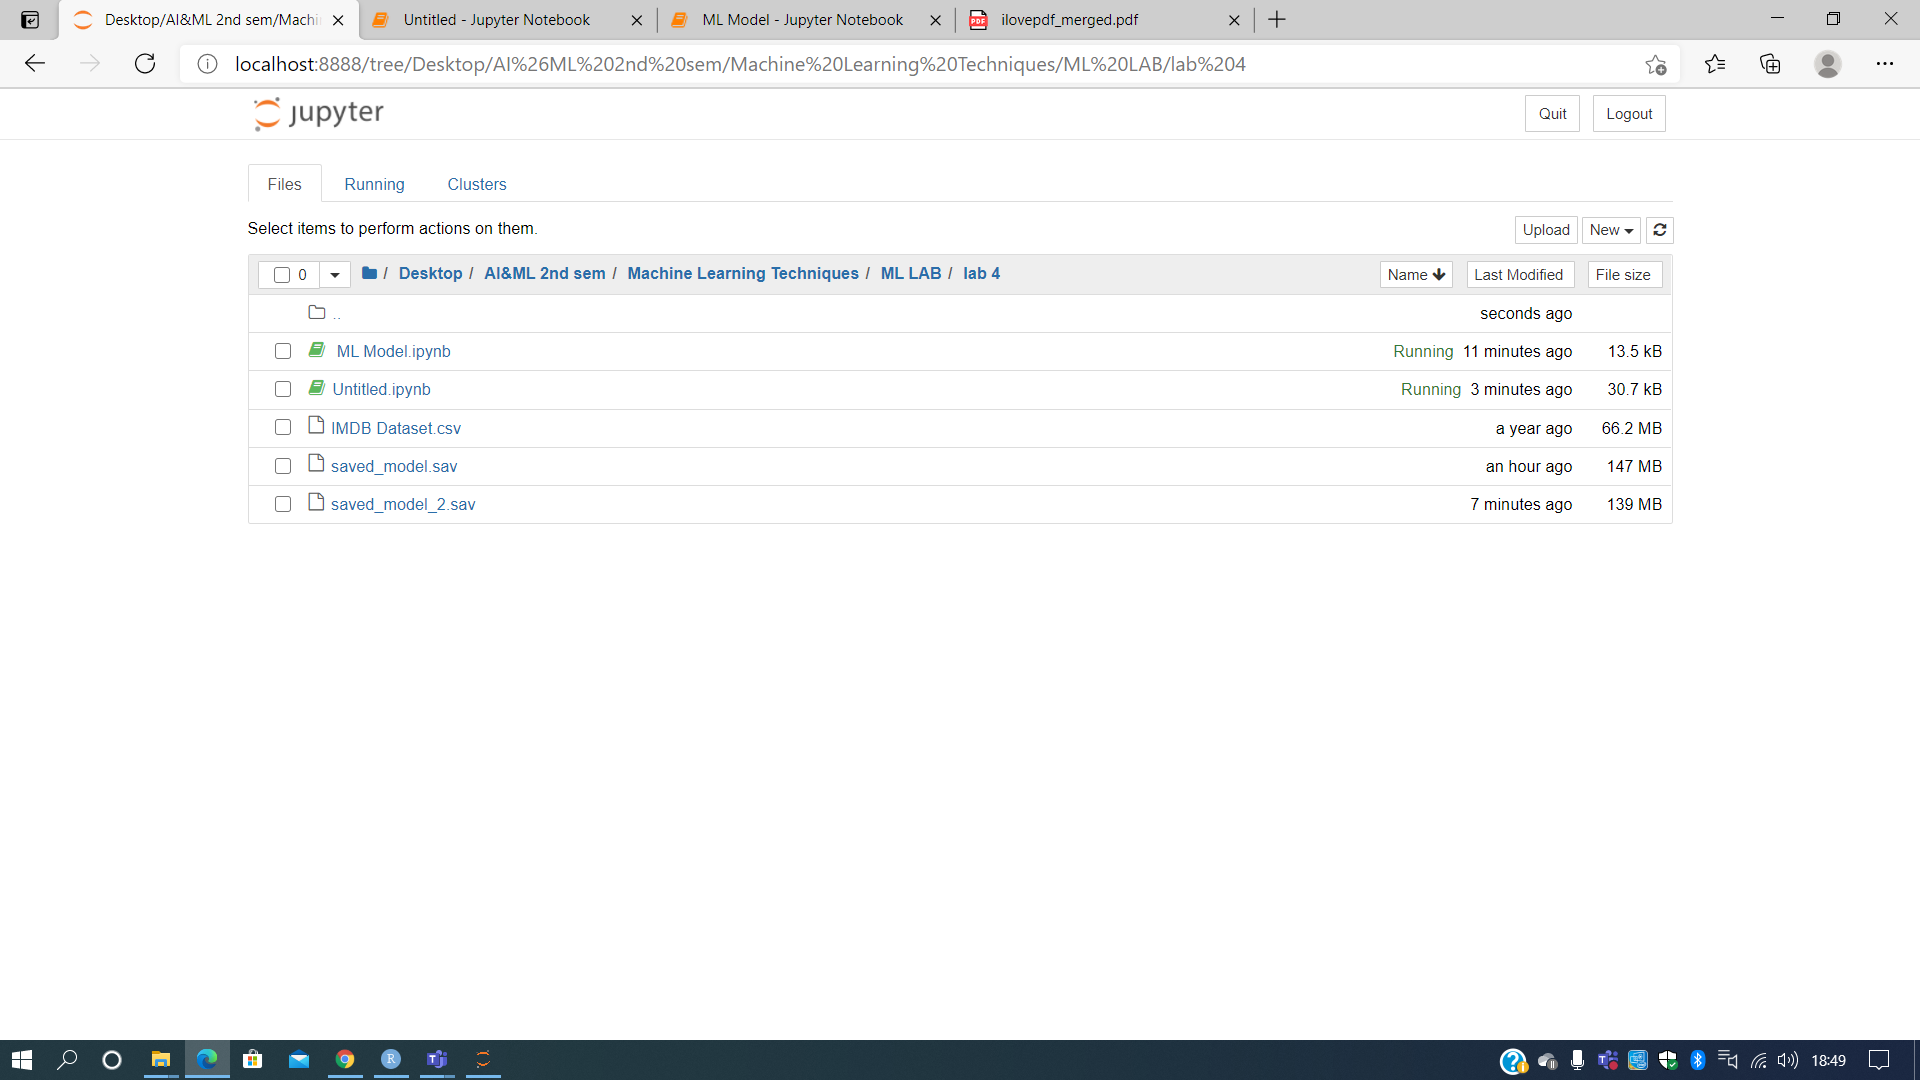